<a href="https://colab.research.google.com/github/Srivastava27/collabPython/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
np.random.seed(2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [8]:
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical


In [6]:
# pip install keras

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [12]:
from keras.optimizers import RMSprop

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
from keras.callbacks import ReduceLROnPlateau

In [15]:
sns.set(style='white',context='notebook',palette='deep')

In [16]:
import random

In [17]:
import os

In [21]:
train=pd.read_csv('/content/Cleaned_Cnn.csv')

In [25]:
train.head()

,title,views_on_vd,time_in_minutes
0,College grad challenges Justice Thomas' argume...,2900.0,19
1,"AI needs 'a new era of law and regulation,' sa...",10000.0,540
2,Hear why Pence wanted to meet with Zelensky an...,86000.0,960
3,Watch as verdict is read in former Parkland sc...,26000.0,1260
4,Legal analyst identifies part of ruling that l...,86000.0,1440


In [23]:
test=pd.read_csv('/content/Uncleaned_cnn1.csv')

In [24]:
test.head()

,title,views,when
0,Lindsey Graham booed at Trump rally in his hom...,26K views,1 hour ago
1,Lindsey Graham booed at Trump rally in his hom...,26K views,1 hour ago
2,Zelensky calls Putin's reaction to Wagner rebe...,71K views,6 hours ago
3,'Losing the 21st century': Fareed examines the...,261K views,1 day ago
4,Ex-CIA operative shares what Wagner rebellion ...,318K views,1 day ago


In [26]:
y_train=train['views_on_vd']

In [27]:
x_train=train.drop(labels=['views_on_vd'],axis=1)

In [28]:
del train

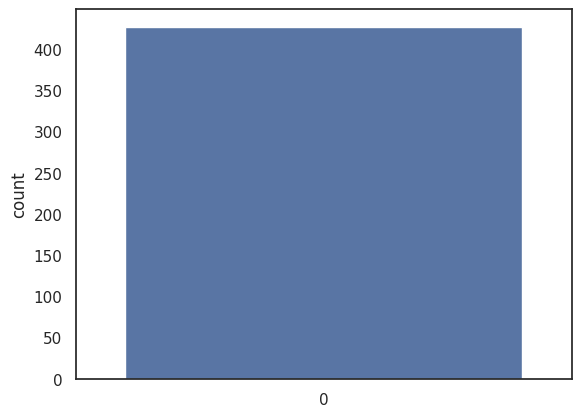

In [29]:
g=sns.countplot(y_train)

In [30]:
y_train.value_counts()

45000.0      5
30000.0      5
93000.0      5
52000.0      5
1000000.0    5
            ..
369000.0     1
686000.0     1
292000.0     1
459000.0     1
270000.0     1
Name: views_on_vd, Length: 281, dtype: int64

In [31]:
x_train.isnull().any().describe()

count         2
unique        1
top       False
freq          2
dtype: object

In [32]:
test.isnull().any().describe()

count         3
unique        1
top       False
freq          3
dtype: object

In [36]:
# x_train=x_train/255
# test=test/255

In [39]:
# y_train=to_categorical(y_train,num_classes=10)

In [40]:
random_seed=2

In [46]:

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)


In [54]:
# g = plt.imshow(X_train[0][:,:,0])

In [55]:
model=Sequential()

In [56]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [58]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [59]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [63]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1, factor=0.5, min_lr=0.00001)

In [64]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86